In [3]:
%load_ext autoreload
%autoreload 2

home_or_office = "home"

import sys
if home_or_office =="home":
    sys.path.extend(['C:\\Code\\Libraries', 'C:/Code/Libraries'])
else:
    sys.path.extend(['C:\\Users\\troy\\Documents\\Code\\Libraries', 'C:\\Users\\troy\\Documents\\Excel Sheets', 
                     'C:/Users/troy/Documents/Code/Libraries'])


## Old code using bernstein polynomial

In [ ]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

def generate_brownian_motion_paths(N, T, mu, sigma=1):
    """
    Generate N Brownian motion paths with T time steps.

    :param N: Number of paths
    :param T: Number of time steps
    :param mu: Drift coefficient
    :param sigma: Volatility coefficient (default is 1)
    :return: A matrix of size N x T with the Brownian paths
    """
    dt = 1.0 / T  # Time step
    paths = np.zeros((N, T))
    # Initial point is always zero for Brownian motion
    for t in range(1, T):
        random_shock = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt), size=N)
        paths[:, t] = paths[:, t-1] + random_shock

    return paths


def evaluate_bernstein_polynomial(coefficients, x):
    """
    Evaluate the value of a Bernstein polynomial at a point x.

    Args:
    coefficients (array-like): Coefficients of the Bernstein polynomial.
    x (float): The point at which to evaluate the polynomial.

    Returns:
    float: The value of the polynomial at x.
    """
    n = len(coefficients) - 1
    value = sum(comb(n, k) * coefficients[k] * (x ** k) * ((1 - x) ** (n - k)) for k in range(n + 1))
    return value


def objective_function(coefficients, paths):

In [ ]:
from scipy.optimize import minimize

N =100000
T = 100
mu = 0.0
sigma = 1.0

paths = generate_brownian_motion_paths(N, T, mu, sigma)

In [ ]:
plt.plot(paths.mean(axis=0))

In [ ]:
coefficients = [0.25] * 10
res = minimize(objective_function, coefficients, args=(paths), method='Nelder-Mead', bounds=[(0, np.inf)]*10)

In [ ]:
res

In [ ]:
from scipy import stats
2 * stats.norm.cdf(1.12) - 1

In [ ]:
coefficients = res.x  # Coefficients for a 3rd degree Bernstein polynomial

x = np.linspace(0, 1, 100)  # Point at which to evaluate the polynomial
plt.plot(x, paths.T, color='grey', alpha=0.01)
plt.plot(x, evaluate_bernstein_polynomial(coefficients, x))
plt.plot(x, 1.12 * np.sqrt(1-x))

In [ ]:
import os
import hashlib 
from pathlib import Path 

file_path = r"E:\MongoBackup\animations"
  
# Listing out all the files 
# inside our root folder. 
list_of_files = os.walk(file_path) 
  
# In order to detect the duplicate 
# files we are going to define an empty dictionary. 
unique_files = dict() 
  
for root, folders, files in list_of_files: 
  
    # Running a for loop on all the files 
    for file in files: 
  
        # Finding complete file path 
        file_path = Path(os.path.join(root, file)) 
  
        # Converting all the content of 
        # our file into md5 hash. 
        Hash_file = hashlib.md5(open(file_path, 'rb').read()).hexdigest() 
  
        # If file hash has already # 
        # been added we'll simply delete that file 
        if Hash_file not in unique_files: 
            unique_files[Hash_file] = file_path 
        else: 
            os.remove(file_path) 
            print(f"{file_path} has been deleted") 


In [ ]:
coefficients = [0.25, 0.25, 0.25, 0.25] 

threshold = evaluate_bernstein_polynomial(coefficients, x)
running_max = np.maximum.accumulate(paths)
running_min = np.minimum.accumulate(paths)
DD = running_max - paths
DU = paths - running_min

objectives = np.zeros(N)
no_hit = []
for (i, sample_path) in enumerate(paths):
    idx = np.where(DD[i] > threshold)[0]
    if idx.size == 0:
        no_hit.append(i) 
    else:
        stop_step = idx[0] + 1
        obj = (np.max(sample_path) - sample_path[stop_step])**2
        objectives[i] = obj

print(np.mean(objectives), len(no_hit))
# sample_path = paths[no_hit[4]]
# plt.plot(np.maximum.accumulate(sample_path) - sample_path)
# plt.plot(threshold)

In [ ]:

import numpy as np
import pandas as pd

# Monte Carlo simulation parameters
n_iterations = 10000
dt = 0.1
sqrt_dt = np.sqrt(dt)

# Define ranges for X and Y with steps
X_values = np.arange(-5, 6, 0.25)  # X from -5 to 5
Y_ranges = {X: np.arange(X, 6, 1) for X in X_values}  # Y from X to 5

# Initialize lists to store results for dataframes
results_stopping = []
results_not_stopping = []

# Perform Monte Carlo simulations for each X and Y
for X in X_values:
    for Y in Y_ranges[X]:
        value_stopping_results_specific = np.zeros(n_iterations)
        value_not_stopping_results_specific = np.zeros(n_iterations)
        
        for i in range(n_iterations):
            dX = np.random.normal(0, 1) * sqrt_dt
            X_1 = X + dX
            Y_1 = max(Y, X + dX)
            
            value_stopping_results_specific[i] = (Y_1 - X)**2
            value_not_stopping_results_specific[i] = (Y_1 - X - dX)**2
        
        # Compute expected values for the specific X and Y
        value_stopping_E_specific = np.mean(value_stopping_results_specific)
        value_not_stopping_E_specific = np.mean(value_not_stopping_results_specific)
        
        # Store results
        results_stopping.append({'X': X, 'Y': Y, 'Expected_Value': value_stopping_E_specific})
        results_not_stopping.append({'X': X, 'Y': Y, 'Expected_Value': value_not_stopping_E_specific})

# Convert lists to dataframes
df_stopping = pd.DataFrame(results_stopping)
df_not_stopping = pd.DataFrame(results_not_stopping)

# Display the dataframes
df_stopping.head(), df_not_stopping.head()

## Attempt to Contruct the Value Function and compute the stopping tme

In [4]:
# From Scratch 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import time 
    

### This is the first attempt to compute the value function directly

In [ ]:
T = 100
N = 10

random_shocks = np.random.normal(0, np.sqrt(1/T), (N, T))

def compute_nested_paths(steps, x, s):
    sample_shocks = random_shocks[:, :steps]
    sample_paths = np.hstack([np.zeros((N, 1)), np.cumsum(sample_shocks, axis=1)]) + x
    running_max = np.maximum.accumulate(sample_paths, axis=1)
    # retain only those values from running_max that are greater than s
    running_max[running_max <= s] = s
    # compute rowwise maximum
    S_1 = np.max(running_max, axis=1)
    # For each column, compute the S_1 - X_t
    O = np.mean((S_1[:, np.newaxis] - sample_paths)**2, axis=0)
    stopping_time = np.argmin(O)
    min_obj = O[stopping_time]
    return min_obj, stopping_time

compute_nested_paths(1, 0, 1)

In [90]:
# This is the class which encapsulates all the functions

class OptimalThreshold:
    def __init__(self, T, N, npaths):
        self.T = T
        self.N = N + 1 if N==1 else N
        self.npaths = npaths
        self.contruct_paths()
        
    def contruct_paths(self):
        # Shocks, we generate a set of shocks and then use it for all the simulations later on for faster computations
        self.sample_shocks = np.random.normal(0, np.sqrt(1/T), size=(self.npaths,N))
        
        # Variables 
        self.X_t = np.hstack([np.zeros((self.npaths, 1)), np.cumsum(self.sample_shocks, axis=1)])
        self.X_t_cont = self.X_t[:, 1:]
        
        self.running_max = np.maximum.accumulate(self.X_t, axis=1)
        self.S1 = self.running_max[:, -1]
        self.S1_2 = self.S1**2
        
        self.X_mean = np.mean(self.X_t_cont, axis=0)
        self.X2_mean = np.mean(self.X_t_cont**2, axis=0)
    
    def V(self, s):
        S2 = np.clip(self.S1_2, s**2, np.inf)
        V_stop = np.mean(S2)
        return V_stop

    def V_cont(self, s):
        S = np.clip(self.S1, s, np.inf)
        S2 = np.clip(self.S1_2, s**2, np.inf)
        mean_S2 = np.mean(S2)
        mena_prod = 2 * np.mean(S[:, np.newaxis] * self.X_t_cont, axis=0)
        O = mean_S2 + self.X2_mean - mena_prod
        stopping_time = np.argmin(O)
        min_obj = O[stopping_time]
        V_stop = min_obj
        return V_stop

    def plot_stop_vs_nonstop_value_func(self, rng = 6):
        s_space = np.linspace(0, rng, 20)
        v = [self.V(s1) for s1 in s_space]
        v_cont = [self.V_cont(s1) for s1 in s_space]
        plt.subplot(211)
        plt.plot(s_space, v, color='red')
        plt.plot(s_space, v_cont,  color='blue')
        
        plt.subplot(212)
        plt.plot(s_space, np.array(v) - np.array(v_cont), color='black')
        plt.axhline(0, color='black', linestyle='--')
    
    def threshold(self):
        try:
            f = lambda s: self.V(s) - self.V_cont(s)
            range_min = 0
            range_max = 6
           # if f(range_min) <=0:
           #     f = lambda s: self.V(s) - self.V_cont(s) if s > 0 else 0.0000001
            
            sol = optimize.root_scalar(f, bracket=[0, range_max], method='ridder')
            r = sol.root
            r = sol.root / 2 # interpolate between N=2 and N=0 (there r= 0)
            return r
        except Exception as e: 
            print("no solution found for - %s" % (str(e)))
            return None
    
    def distribution_of_threshold(self, n=100):
        thresholds = []
        for i in range(n):
            self.contruct_paths()
            thresholds.append(self.threshold())
        return thresholds

    def plot_threshold_distribution(self):
        thresholds = self.distribution_of_threshold()
        plt.hist(thresholds, bins=20)
        plt.axvline(np.mean(thresholds), color='red', linestyle='--')
        plt.axvline(np.median(thresholds), color='green', linestyle='--')
        plt.axvline(np.percentile(thresholds, 5), color='black', linestyle='--')
        plt.axvline(np.percentile(thresholds, 95), color='black', linestyle='--')
        print(np.mean(thresholds), np.std(thresholds), np.median(thresholds), np.percentile(thresholds, 5), np.percentile(thresholds, 95))
        
    

0.23353596103303775
0.22024651939175133
0.21411644870089766
0.21138635469554384
0.22610820937606776
0.22878824424465058
0.21324292091225994
0.21267644736765798
0.2071937192837937
0.21729771113947338
0.22685226157762353
0.22503881994374028
0.21555105174668648
0.21613388057387722
0.21380920546579282
0.20756081093501635
0.21008579675701916
0.21503131621907295
0.2124351415241934
0.21525030797790662


0.21525030797790662

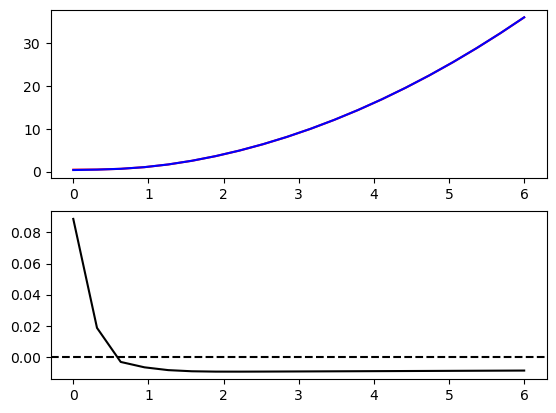

In [104]:
T = 100
N = 50
npaths = 100000

obj = OptimalThreshold(T, N, npaths)

for i in range(20):
    obj = OptimalThreshold(T, N, npaths)
    print(obj.threshold())  
    
obj.V(0), obj.V_cont(0)
obj.plot_stop_vs_nonstop_value_func()
obj.threshold()


In [106]:
T = 100
npaths = 100000

thresholds = []
thresholds_std = []
for N in range(2, T+1):
    dist = []
    for i in range(20):
        obj = OptimalThreshold(T, N, npaths)
        try:
            t = obj.threshold()
        except:
            t = -1
        dist.append(t)
        # if N ==1:
        #     print(dist)
    if len(dist) >0 :
        thresholds.append(np.mean(dist))
        thresholds_std.append(np.std(dist))
        print(N, thresholds[-1])
    else:
        print(N, "No solution")
        thresholds.append(-1)
        thresholds_std.append(-1)

plt.plot(range(2, T+1), thresholds)
plt.plot(range(2, T+1), np.array(thresholds) + np.array(thresholds_std))
plt.plot(range(2, T+1), np.array(thresholds) - np.array(thresholds_std))

2 0.017808690737713136
3 0.030083983082500813
4 0.03936090134241278
5 0.04804443202077749
6 0.05476497651373404
7 0.061588123840626986
8 0.06804931715124367
9 0.07406495009596316
10 0.07881652064726372
11 0.08508259084562239
12 0.088347575928334
13 0.09480678280170854
14 0.09890441822855219
15 0.10570494932913499
16 0.1076621466746088
17 0.11362797569633284
18 0.11505743550006879
19 0.12041790548932874
20 0.1243823321012106
no solution found for - f(a) and f(b) must have different signs


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

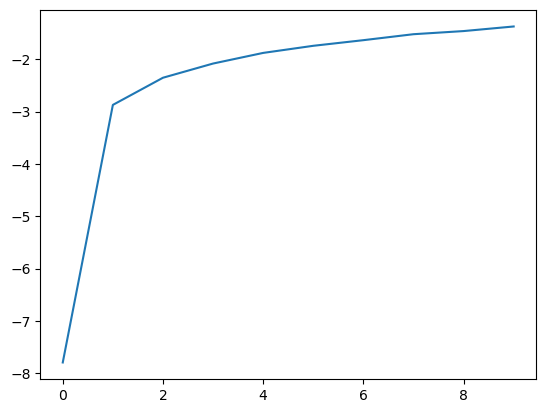

In [91]:
plt.plot(np.log(thresholds))

Time for initial setup 0.1269996166229248
Time for V(s) 0.0 0.014001607894897461
Time for V(s) 0.0 0.012058734893798828
Time for V(s) 0.0 0.011061668395996094
Time for V(s) 0.0 0.012986421585083008
Time for V(s) 0.0 0.013988256454467773
Time for V(s) 0.0 0.01201319694519043
Time for V(s) 0.0 0.011974573135375977
Time for V(s) 0.0 0.011989831924438477
Time for V(s) 0.0 0.01595902442932129
Time for V(s) 0.0 0.014031171798706055
Time for V(s) 0.0 0.015020370483398438
Time for V(s) 0.0 0.01200103759765625
Time for V(s) 0.0 0.0140228271484375
Time for V(s) 0.0 0.01500701904296875
Time for V(s) 0.0 0.013007164001464844
Time for V(s) 0.0 0.011945009231567383
Time for V(s) 0.0 0.013021707534790039
Time for V(s) 0.0 0.01199793815612793
Time for V(s) 0.0 0.012020587921142578
Time for V(s) 0.0 0.015021085739135742
Time for V_cont_arr(s) 0.0 0.016982316970825195
Time for V_cont_arr(s) 0.0 0.01707148551940918
Time for V_cont_arr(s) 0.0 0.018950939178466797
Time for V_cont_arr(s) 0.0 0.0169763565063

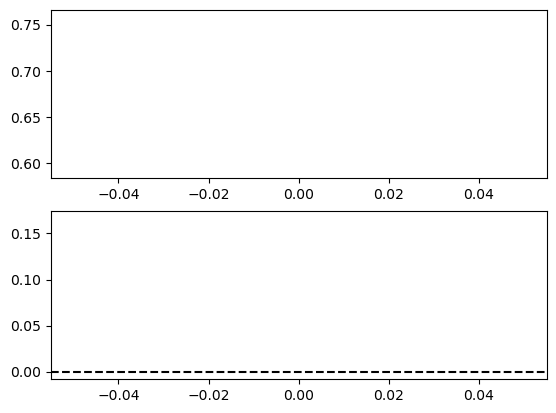

In [11]:
T = 10
N = 10
npaths = 100000

obj = OptimalThreshold(T, N, npaths)

t1 = time.time()
sample_shocks = np.random.normal(0, np.sqrt(1/T), size=(npaths,N))
X_t = np.hstack([np.zeros((npaths, 1)), np.cumsum(sample_shocks, axis=1)])
X_t_cont = X_t[:, 1:]
running_max = np.maximum.accumulate(X_t, axis=1)
S1 = running_max[:, -1]
S1_2 = S1**2
X_mean = np.mean(X_t_cont, axis=0)
X2_mean = np.mean(X_t_cont**2, axis=0)
print("Time for initial setup", time.time() - t1)

def V(s):
    t1 = time.time()
    top = running_max.copy()
    top[top <= s] = s
    S_1 = top[:, -1]
    V_stop = np.mean(S_1**2)
    print("Time for V(s)", s, time.time() - t1)
    return V_stop

def V_cont_old(s):
    top = running_max.copy()
    top[top <= s] = s
    S_1 = top[:, -1]
    O = np.mean((S_1[:, np.newaxis] - X_t_cont)**2, axis=0)
    stopping_time = np.argmin(O)
    min_obj = O[stopping_time]
    V_stop = min_obj
    print("Time for V_cont(s)", s, time.time() - t1)
    return V_stop

def V_cont(s):
    t1 = time.time()
    S = np.clip(S1, s, np.inf)
    S2 = np.clip(S1_2, s**2, np.inf)
    mean_S2 = np.mean(S2)
    mena_prod = 2 * np.mean(S[:, np.newaxis] * X_t_cont, axis=0)
    O = mean_S2 + X2_mean - mena_prod
    stopping_time = np.argmin(O)
    min_obj = O[stopping_time]
    V_stop = min_obj
    print("Time for V_cont_arr(s)", s, time.time() - t1)
    return V_stop

scaler = np.sqrt((N)/T)
s_space = np.linspace(0, np.sqrt((T-N)/T)*20, 20)
v1 = np.array([obj.V(s1) for s1 in s_space])
v_cont1 = np.array([obj.V_cont(s1) for s1 in s_space])

scaler = np.sqrt((N)/T)
s_space = np.linspace(0, np.sqrt((T-N)/T)*20, 20)
v = [V(s1) for s1 in s_space]
v_cont = [V_cont(s1) for s1 in s_space]

try:
    t1 = time.time()
    f = lambda s: V(s) - V_cont(s)
    sol = optimize.root_scalar(f, bracket=[0, np.sqrt((T-N)/T)*6], method='brentq')
    print(sol, scaler)
    print("Time for root_scalar", time.time() - t1)
except Exception as e: 
    print("no solution found - %s" % str(e))
finally:
    t1 = time.time()
    plt.subplot(211)
    plt.plot(s_space, v, color='red')
    plt.plot(s_space, v_cont,  color='blue')
    plt.plot(s_space, v1, color='black')
    plt.plot(s_space, v_cont1,  color='red')
    # plt.plot(s_space / np.sqrt(1/T), np.array(v) - np.array(v_cont), color='red')
    plt.subplot(212)
    plt.plot(s_space, np.array(v) - np.array(v_cont), color='black')
    plt.plot(s_space, np.array(v1) - np.array(v_cont1), color='red')
    plt.axhline(0, color='black', linestyle='--')
    print("Time for plotting", time.time() - t1)


no solution found - f(a) and f(b) must have different signs
1 None
no solution found - f(a) and f(b) must have different signs
2 None
3 0.17581422934433458
4 0.2671583380875884
no solution found - f(a) and f(b) must have different signs
5 None
6 0.3460911431178653
7 0.4247139110663763
8 0.3993108094321528
no solution found - f(a) and f(b) must have different signs
9 None
10 0.46957777617179663


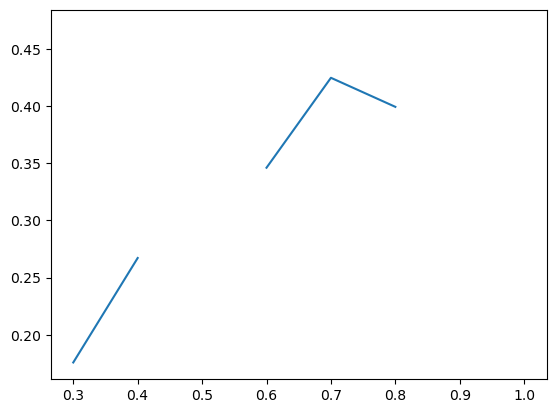

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import optimize

# encapsulate the code in teh previous cell as  afunction of N, T, npaths
def compute_stopping_time(N, T, npaths):
    sample_shocks = np.random.normal(0, np.sqrt(1/T), size=(npaths,N))
    X_t = np.hstack([np.zeros((npaths, 1)), np.cumsum(sample_shocks, axis=1)])
    running_max = np.maximum.accumulate(X_t, axis=1)
    # sample 5 rows from an 2D numpy array
    # running_max[np.random.choice(running_max.shape[0], 5, replace=False), :]
    iterations = 100
    
    def V(s):
        V_stops = []
        for i in range(iterations):
            idx = np.random.choice(running_max.shape[0], npaths - iterations)
            top = running_max[idx, :]
            # top = running_max.copy()
            top[top <= s] = s
            S_1 = top[:, -1]
            V_stop = np.mean(S_1**2)
            V_stops.append(V_stop)
        return np.mean(V_stops)

    def V_cont(s):
        V_stops = []
        for i in range(iterations):
            idx = np.random.choice(running_max.shape[0], npaths - iterations)
            top = running_max[idx, :]
            top = running_max.copy()
            top[top <= s] = s
            S_1 = top[:, -1]
            O = np.mean((S_1[:, np.newaxis] - X_t[:, 1:])**2, axis=0)
            stopping_time = np.argmin(O)
            min_obj = O[stopping_time]
            V_stop = min_obj
            V_stops.append(V_stop)
        return np.mean(V_stops)

    # scaler = np.sqrt((N-1)/T)
    # s_space = np.linspace(0, 4*scaler, 20)
    # v = [V(s1) for s1 in s_space]
    # v_cont = [V_cont(s1) for s1 in s_space]
    try:
        f = lambda s: V(s) - V_cont(s)
        sol = optimize.root_scalar(f, bracket=[0, 20], method='brentq')
        root = sol.root
        return root
    except Exception as e: 
        print("no solution found - %s" % str(e))
        return None
    
# Calibrate operating parameters - check the imapct of the number of paths on the stopping time
def plot_stopping_time_dependence_on_npaths():
    T = 10
    N = 5

    means = []
    variances = []
    num_paths = [1000, 10000, 50000, 100000, 500000, 1000000]
    for npaths in num_paths:
        results = []
        for i in range(20):
            root = compute_stopping_time(N, T, npaths)
            if root is not None:
                results.append(root)
        if len(results) > 0:
            means.append(np.mean(results))
            variances.append(np.var(results))
            print(npaths, means[-1], variances[-1])
        else:
            print(npaths, "No results")

    means = np.array(means)
    variances = np.array(variances)

    plt.plot(num_paths, means)  
    plt.plot(num_paths, means + np.sqrt(variances))
    plt.plot(num_paths, means - np.sqrt(variances))
    
def plot_stopping_time_as_function_of_N():
    T = 10
    N = np.arange(10)+1
    npaths = 10000
    stoppingtimes = []
    for i in N:
        root = compute_stopping_time(i, T, npaths)
        print(i, root)
        stoppingtimes.append(root)
    plt.plot(N/T, stoppingtimes)

plot_stopping_time_as_function_of_N()